# Task 1: Import the adult dataset from the ucimlrepo

In [20]:
!pip install ucimlrepo

In [2]:
import pandas as pd

In [3]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [4]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country', 'income']

In [5]:
# Read CSV data into DataFrame
df = pd.read_csv(data_url, names=column_names)

# Task 2: Take a quick look at the data structure (i.e., X) using .head(), .info(), .describe(), and .shape.

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.shape

(32561, 15)

## Task 2.1: Plot a histogram of the data.

In [10]:
# install matplotlib
!pip install matplotlib

In [11]:
# import pyplot module
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

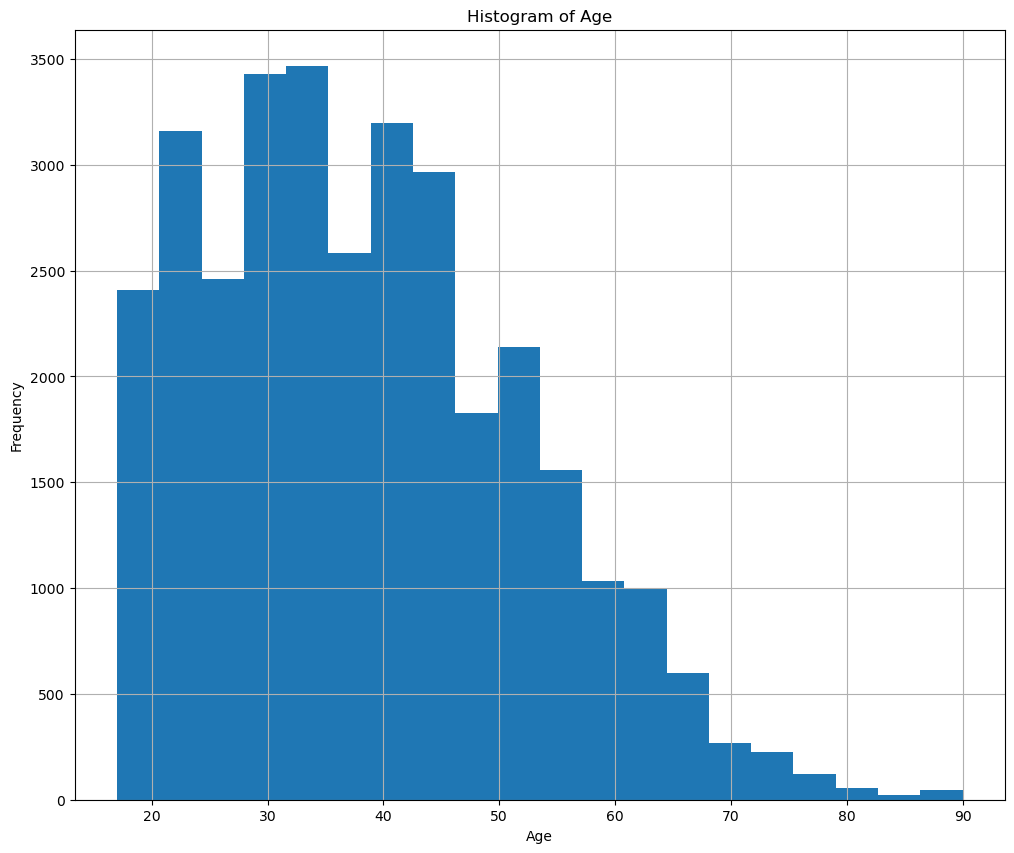

In [12]:
#set the graph size
plt.rcParams["figure.figsize"] = (12,10)
df['age'].hist(bins=20)
#Set titles and axis labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Change "age" in df['age'] to other column_names then could check other histogram

# Task 3: There are missing values in this dataset that are entered as ?, check for the number of these missing values. 

In [13]:
# Check the number of '?'
missing_values = (df == '?').sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# Task 4: Replace the missing values you found in the previous step with null (nan). Run a X.info() to see the non-null count. 

In [14]:
import numpy as np
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Task 5: Create and apply a preprocessing pipeline to:
## 1. Fill in the missing numerical values with the mean using a SimpleImputer.
## 2. Scale the numerical columns using StandardScaler. Do not scale the target.
## 3. Fill in the missing categorical values with the most_frequent value using SimpleImputer.
## 4. Encode the categorical columns using OneHotEncoder. Do not encode the target.
## - Display your pipeline.
## - Print X_prepared.shape.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#set "income" as target_column
target_column = 'income'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Determine the columns of numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessing step for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create preprocessing steps for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False))
])

# Use ColumnTransformer to merge preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Preprocess feature X using the defined pipeline
X_prepared = preprocessor.fit_transform(X)

print(preprocessor)
print(X_prepared.shape)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])
(32561, 108)


C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

# Task 6: Check the target value_counts. You will notice that the target needs some data cleaning.

In [16]:
target_counts = df['income'].value_counts()
print(target_counts)

# Clean the target column to ensure consistency
df['income'] = df['income'].str.strip()
# doublecheck
print(df['income'].value_counts())

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


# Task 7: Remove the period at the end of the >50K. and <=50K. i.e., replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K 
## Run the value_counts again.

In [17]:
# replace "." with " "
df['income'] = df['income'].str.replace('.', '')
cleaned_target_value_counts = df['income'].value_counts()
print(cleaned_target_value_counts)

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


# Task 8: Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.

In [19]:
from sklearn.model_selection import train_test_split

# 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26048, 14) (6513, 14) (26048,) (6513,)
